In [32]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Read in daily ridership data
file_path = os.path.join('..','assets', 'MTA_Daily_Ridership_Data__Beginning_2020_20241001.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Read in hourly bus ridership data
bus_file_path = os.path.join('..', 'assets', 'hourly_bus_ridership.csv')
hourly_bus_df = pd.read_csv(bus_file_path)

# Read in hourly subway ridership data
subway_file_path = os.path.join('..', 'assets', 'hourly_subway_ridership.csv')
hourly_subway_df = pd.read_csv(subway_file_path)

# Convert 'hour' column to datetime for both datasets
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour'])
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour'])

# Display the first few rows of each dataset
print("Hourly Bus Ridership Data:")
print(hourly_bus_df.head())
print("\nHourly Subway Ridership Data:")
print(hourly_subway_df.head())



Hourly Bus Ridership Data:
                        hour  total_ridership
0  2022-01-31 19:00:00-05:00          11334.0
1  2022-01-31 20:00:00-05:00           3786.0
2  2022-01-31 21:00:00-05:00           2732.0
3  2022-01-31 22:00:00-05:00           3503.0
4  2022-01-31 23:00:00-05:00          12289.0

Hourly Subway Ridership Data:
                        hour  total_ridership
0  2022-01-31 19:00:00-05:00          11334.0
1  2022-01-31 20:00:00-05:00           3786.0
2  2022-01-31 21:00:00-05:00           2732.0
3  2022-01-31 22:00:00-05:00           3503.0
4  2022-01-31 23:00:00-05:00          12289.0


In [34]:
import pytz
from datetime import timedelta

# For bus data
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour'], utc=True)
hourly_bus_df['hour'] = hourly_bus_df['hour'].dt.tz_convert('America/New_York')
daily_bus_df = hourly_bus_df.set_index('hour').resample('D', offset=timedelta(hours=4)).sum().reset_index()
daily_bus_df['hour'] = daily_bus_df['hour'].dt.tz_localize(None)
daily_bus_df = daily_bus_df.rename(columns={'hour': 'Date'})

# For subway data
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour'], utc=True)
hourly_subway_df['hour'] = hourly_subway_df['hour'].dt.tz_convert('America/New_York')
daily_subway_df = hourly_subway_df.set_index('hour').resample('D', offset=timedelta(hours=4)).sum().reset_index()
daily_subway_df['hour'] = daily_subway_df['hour'].dt.tz_localize(None)
daily_subway_df = daily_subway_df.rename(columns={'hour': 'Date'})


# Display the first few rows of each dataset
print("Daily Bus Ridership Data:")
print(daily_bus_df.head())
print("\nDaily Subway Ridership Data:")
print(daily_subway_df.head())

# Optionally, you can compare with the original daily data
print("\nOriginal Daily Data:")
print(df[['Date', 'Subways: Total Estimated Ridership', 'Buses: Total Estimated Ridership']].head())

# Calculate and print the total ridership for each dataset
print("\nTotal Ridership Comparison:")
print(f"Bus (from hourly data): {daily_bus_df['total_ridership'].sum():,}")
print(f"Subway (from hourly data): {daily_subway_df['total_ridership'].sum():,}")
print(f"Bus (from daily data): {df['Buses: Total Estimated Ridership'].sum():,}")
print(f"Subway (from daily data): {df['Subways: Total Estimated Ridership'].sum():,}")


Daily Bus Ridership Data:
                 Date  total_ridership
0 2022-01-31 04:00:00         492267.0
1 2022-02-01 04:00:00        2015745.0
2 2022-02-02 04:00:00        2203897.0
3 2022-02-03 04:00:00        2125717.0
4 2022-02-04 04:00:00        1640880.0

Daily Subway Ridership Data:
                 Date  total_ridership
0 2022-01-31 04:00:00         492267.0
1 2022-02-01 04:00:00        2015745.0
2 2022-02-02 04:00:00        2203897.0
3 2022-02-03 04:00:00        2125717.0
4 2022-02-04 04:00:00        1640880.0

Original Daily Data:
         Date  Subways: Total Estimated Ridership  \
0  03/01/2020                             2212965   
1  03/02/2020                             5329915   
2  03/03/2020                             5481103   
3  03/04/2020                             5498809   
4  03/05/2020                             5496453   

   Buses: Total Estimated Ridership  
0                            984908  
1                           2209066  
2                    

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_40055/144115184.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


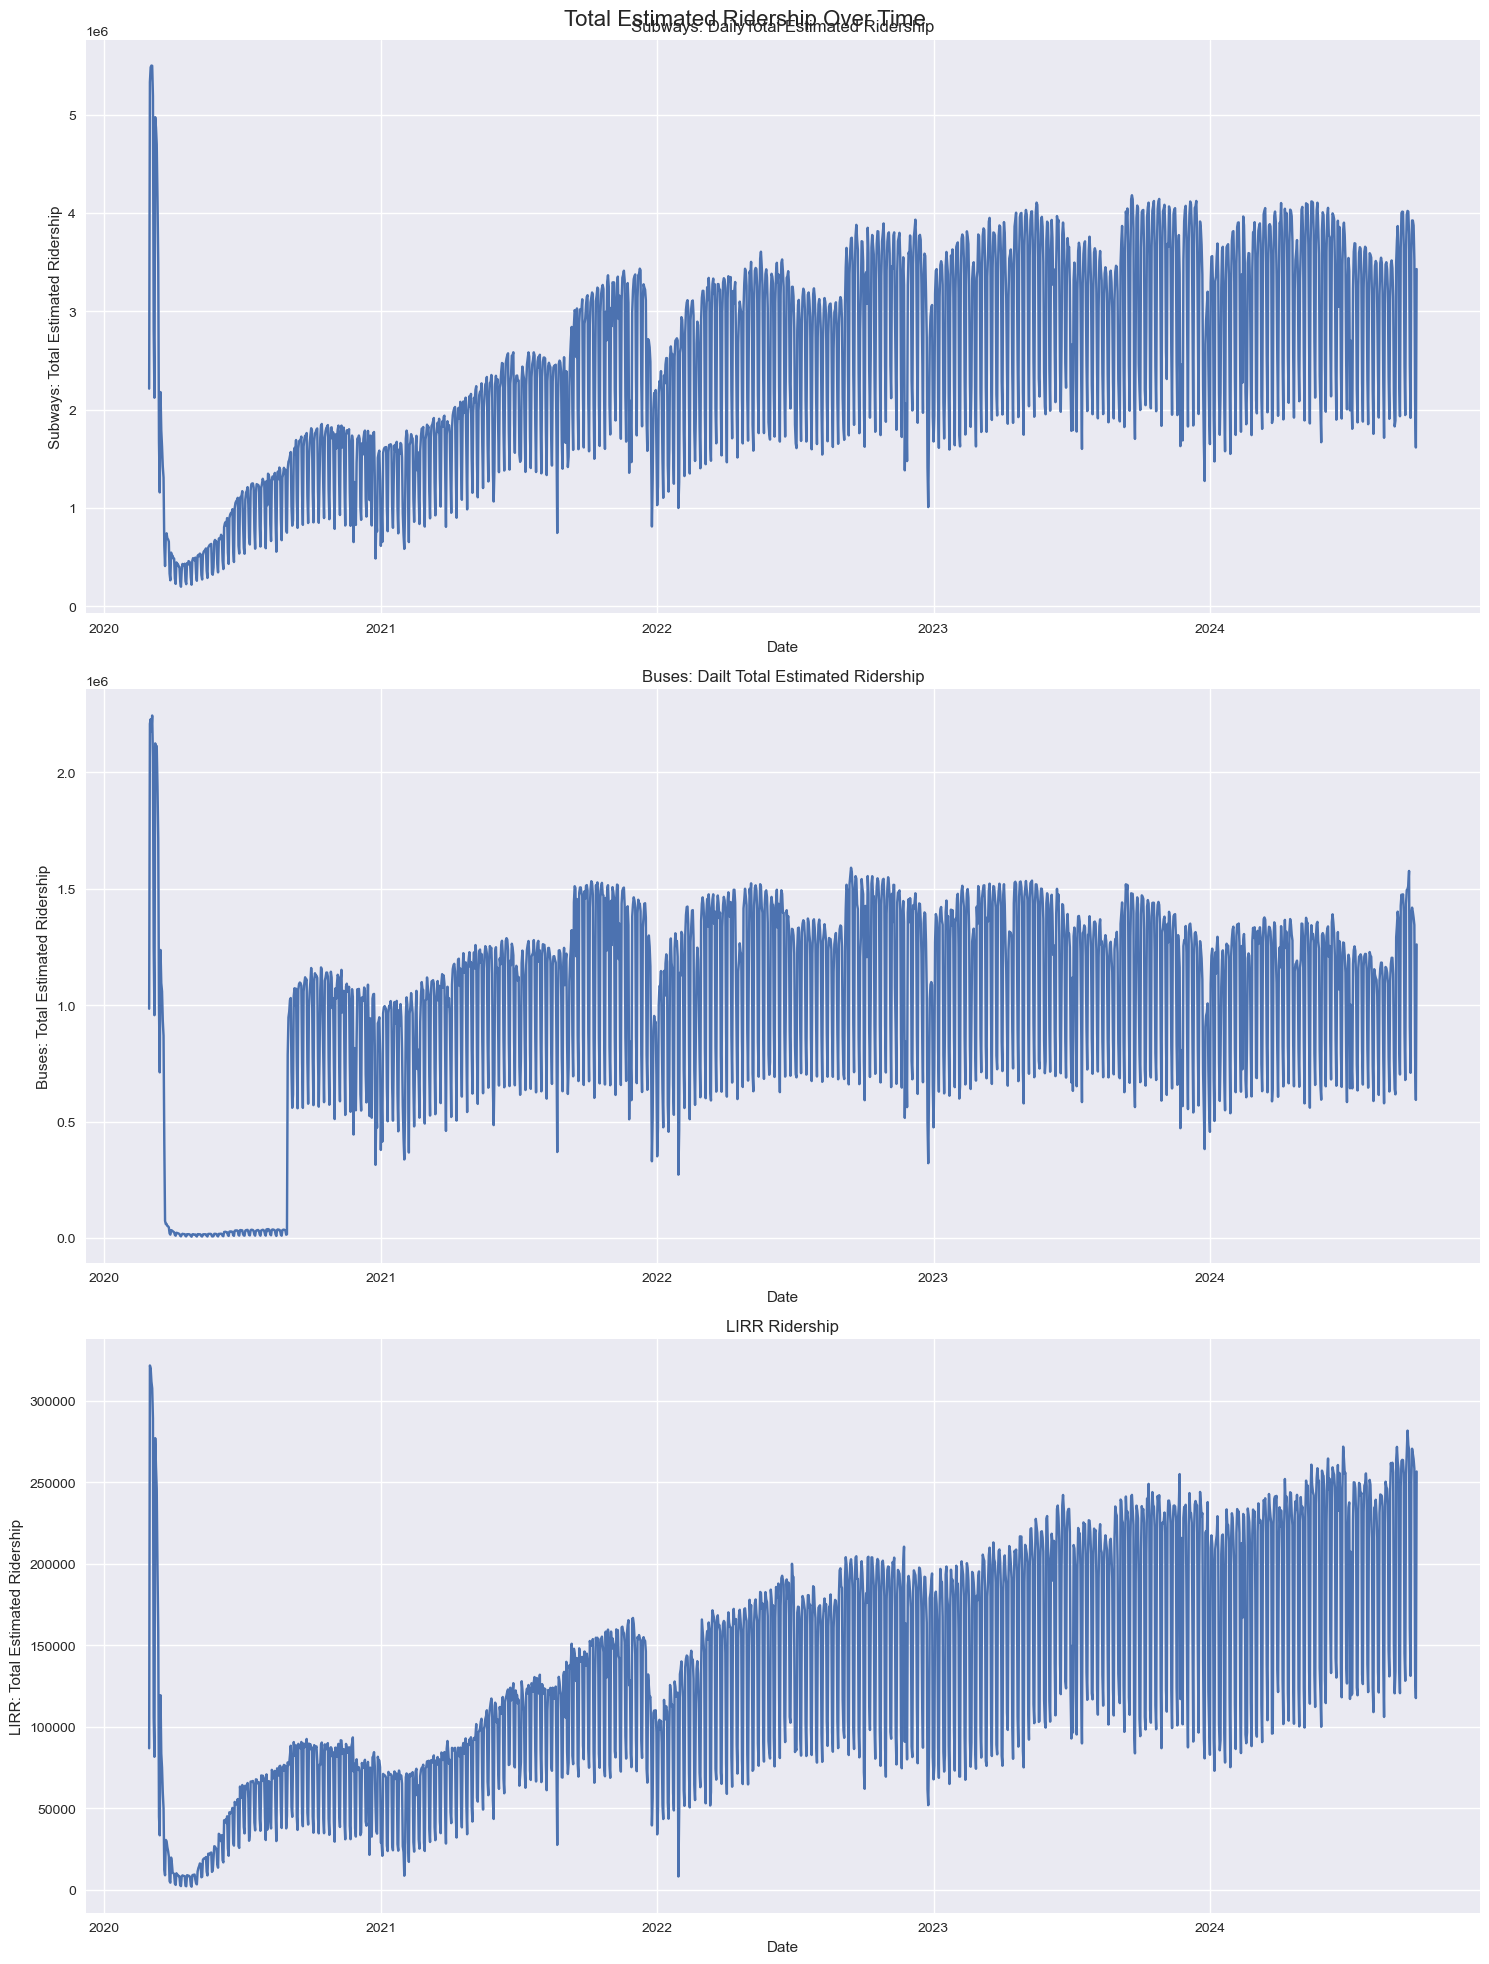

In [35]:


# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(3, 1, figsize=(15, 20))
fig.suptitle('Total Estimated Ridership Over Time', fontsize=16)

# Plot for Bus
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0])
axs[0].set_title('Subways: DailyTotal Estimated Ridership')
axs[0].set_xlabel('Date')

# Plot for Subway
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[1])
axs[1].set_title('Buses: Dailt Total Estimated Ridership')
axs[1].set_xlabel('Date')

# Plot for LIRR
sns.lineplot(x='Date', y='LIRR: Total Estimated Ridership', data=df, ax=axs[2])
axs[2].set_title('LIRR Ridership')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_40055/3445591482.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


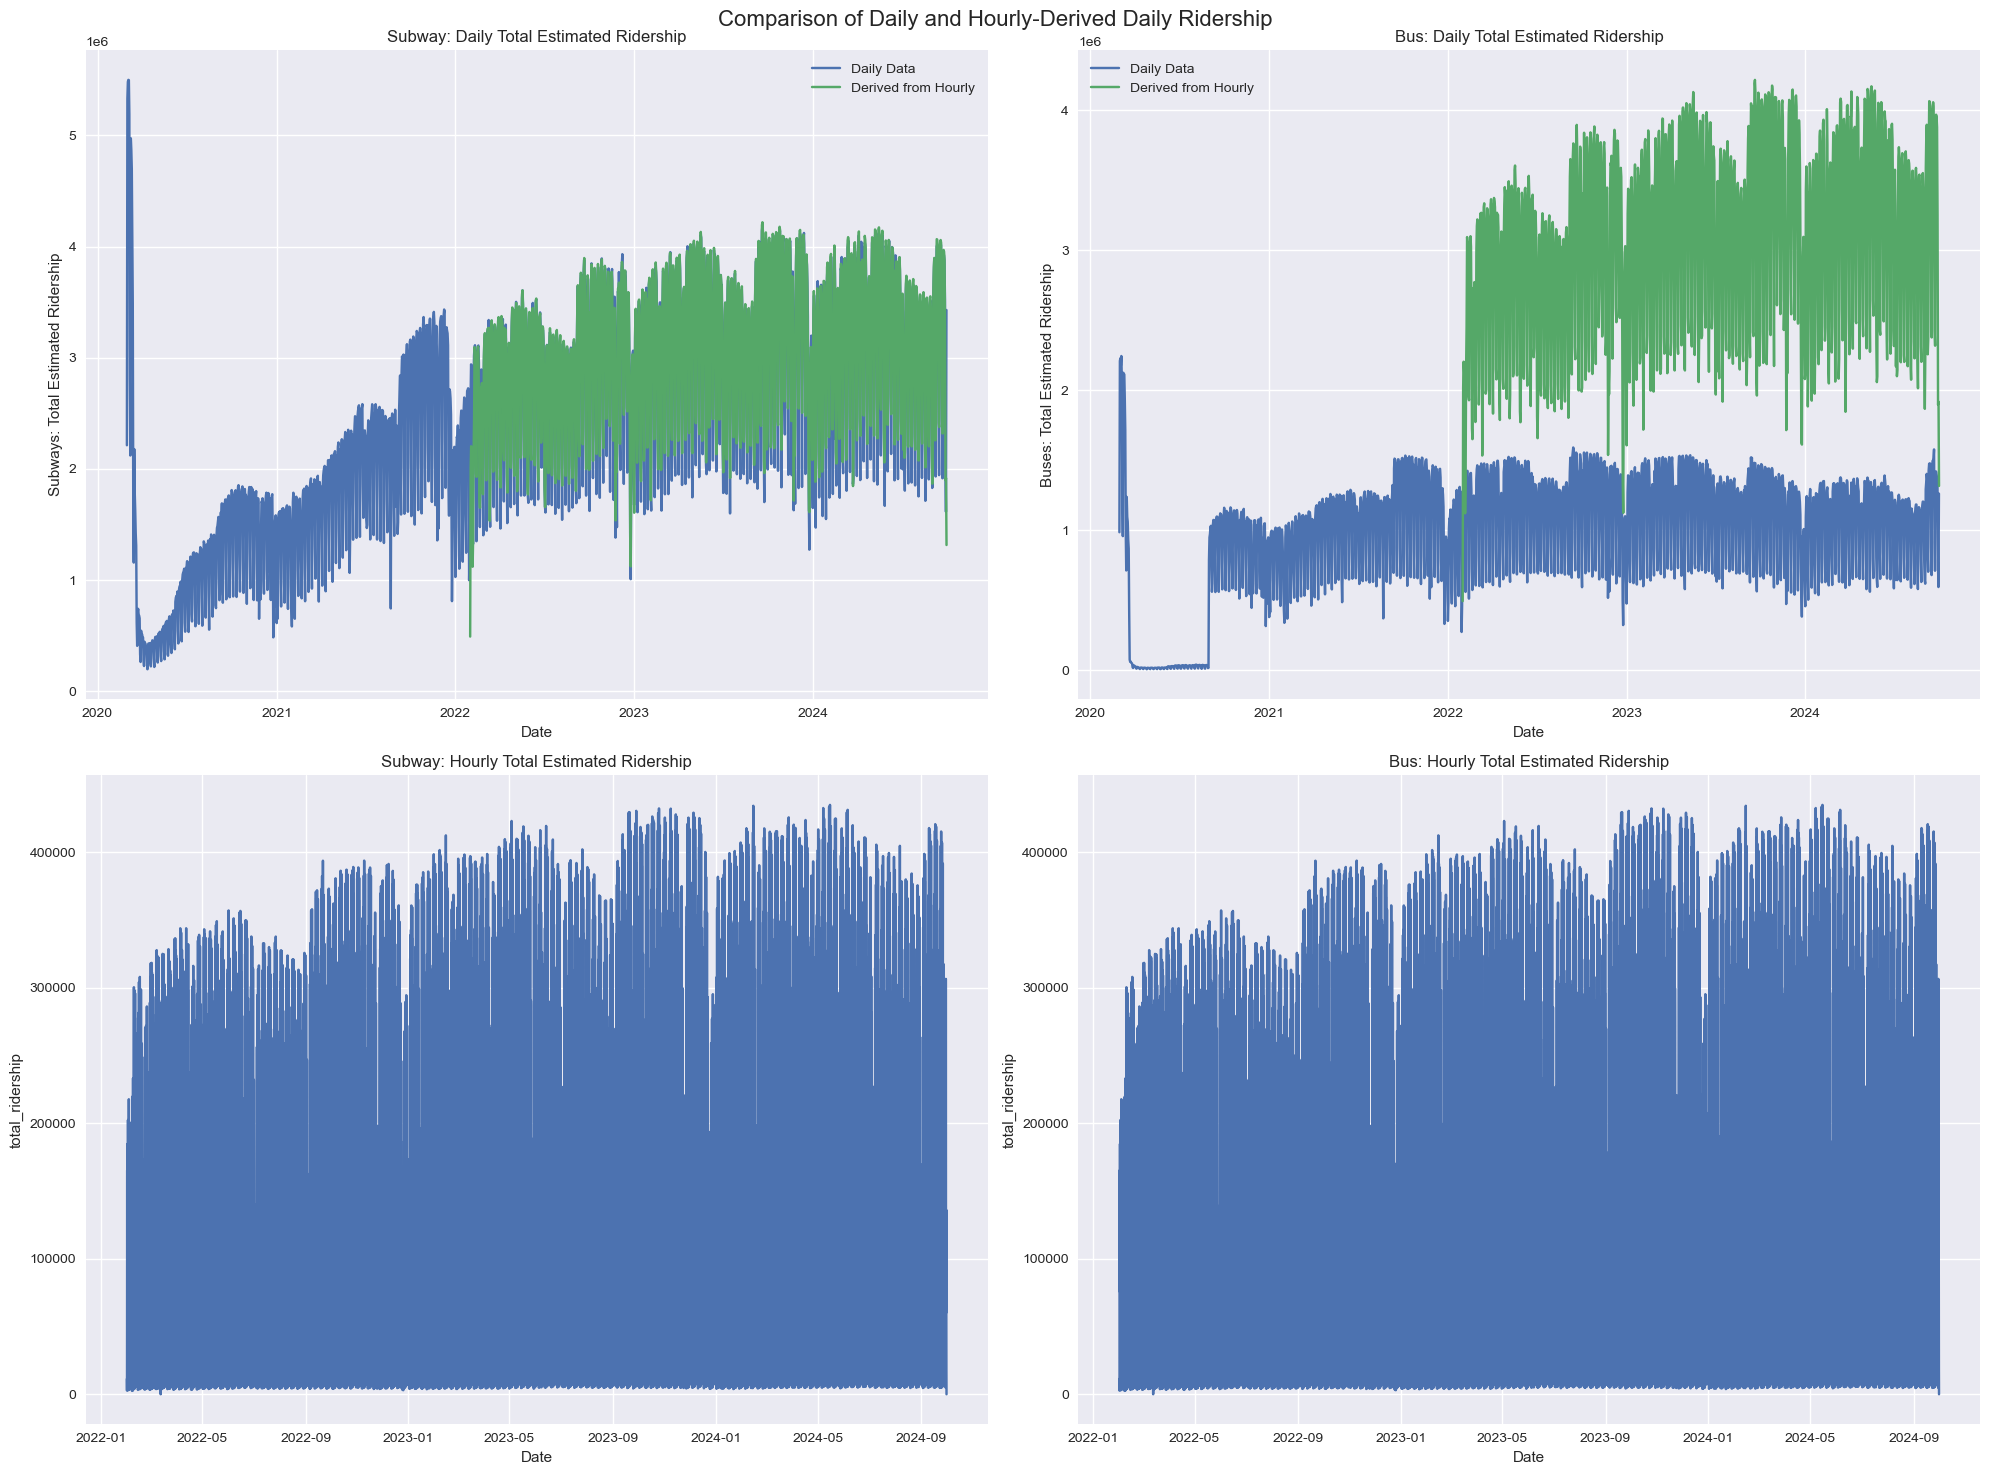

In [36]:
# Convert 'hour' column to datetime for hourly data and remove timezone info
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour']).dt.tz_localize(None)
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour']).dt.tz_localize(None)

# Ensure 'Date' column in daily_subway_df and daily_bus_df has no timezone info
daily_subway_df['Date'] = pd.to_datetime(daily_subway_df['Date']).dt.tz_localize(None)
daily_bus_df['Date'] = pd.to_datetime(daily_bus_df['Date']).dt.tz_localize(None)

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Comparison of Daily and Hourly-Derived Daily Ridership', fontsize=16)

# Plot for Subway
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0, 0], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_subway_df, ax=axs[0, 0], label='Derived from Hourly')
axs[0, 0].set_title('Subway: Daily Total Estimated Ridership')
axs[0, 0].set_xlabel('Date')
axs[0, 0].legend()

# Plot for Bus
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[0, 1], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_bus_df, ax=axs[0, 1], label='Derived from Hourly')
axs[0, 1].set_title('Bus: Daily Total Estimated Ridership')
axs[0, 1].set_xlabel('Date')
axs[0, 1].legend()

# Plot hourly data for Subway
sns.lineplot(x='hour', y='total_ridership', data=hourly_subway_df, ax=axs[1, 0])
axs[1, 0].set_title('Subway: Hourly Total Estimated Ridership')
axs[1, 0].set_xlabel('Date')

# Plot hourly data for Bus
sns.lineplot(x='hour', y='total_ridership', data=hourly_bus_df, ax=axs[1, 1])
axs[1, 1].set_title('Bus: Hourly Total Estimated Ridership')
axs[1, 1].set_xlabel('Date')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_40055/2438362871.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


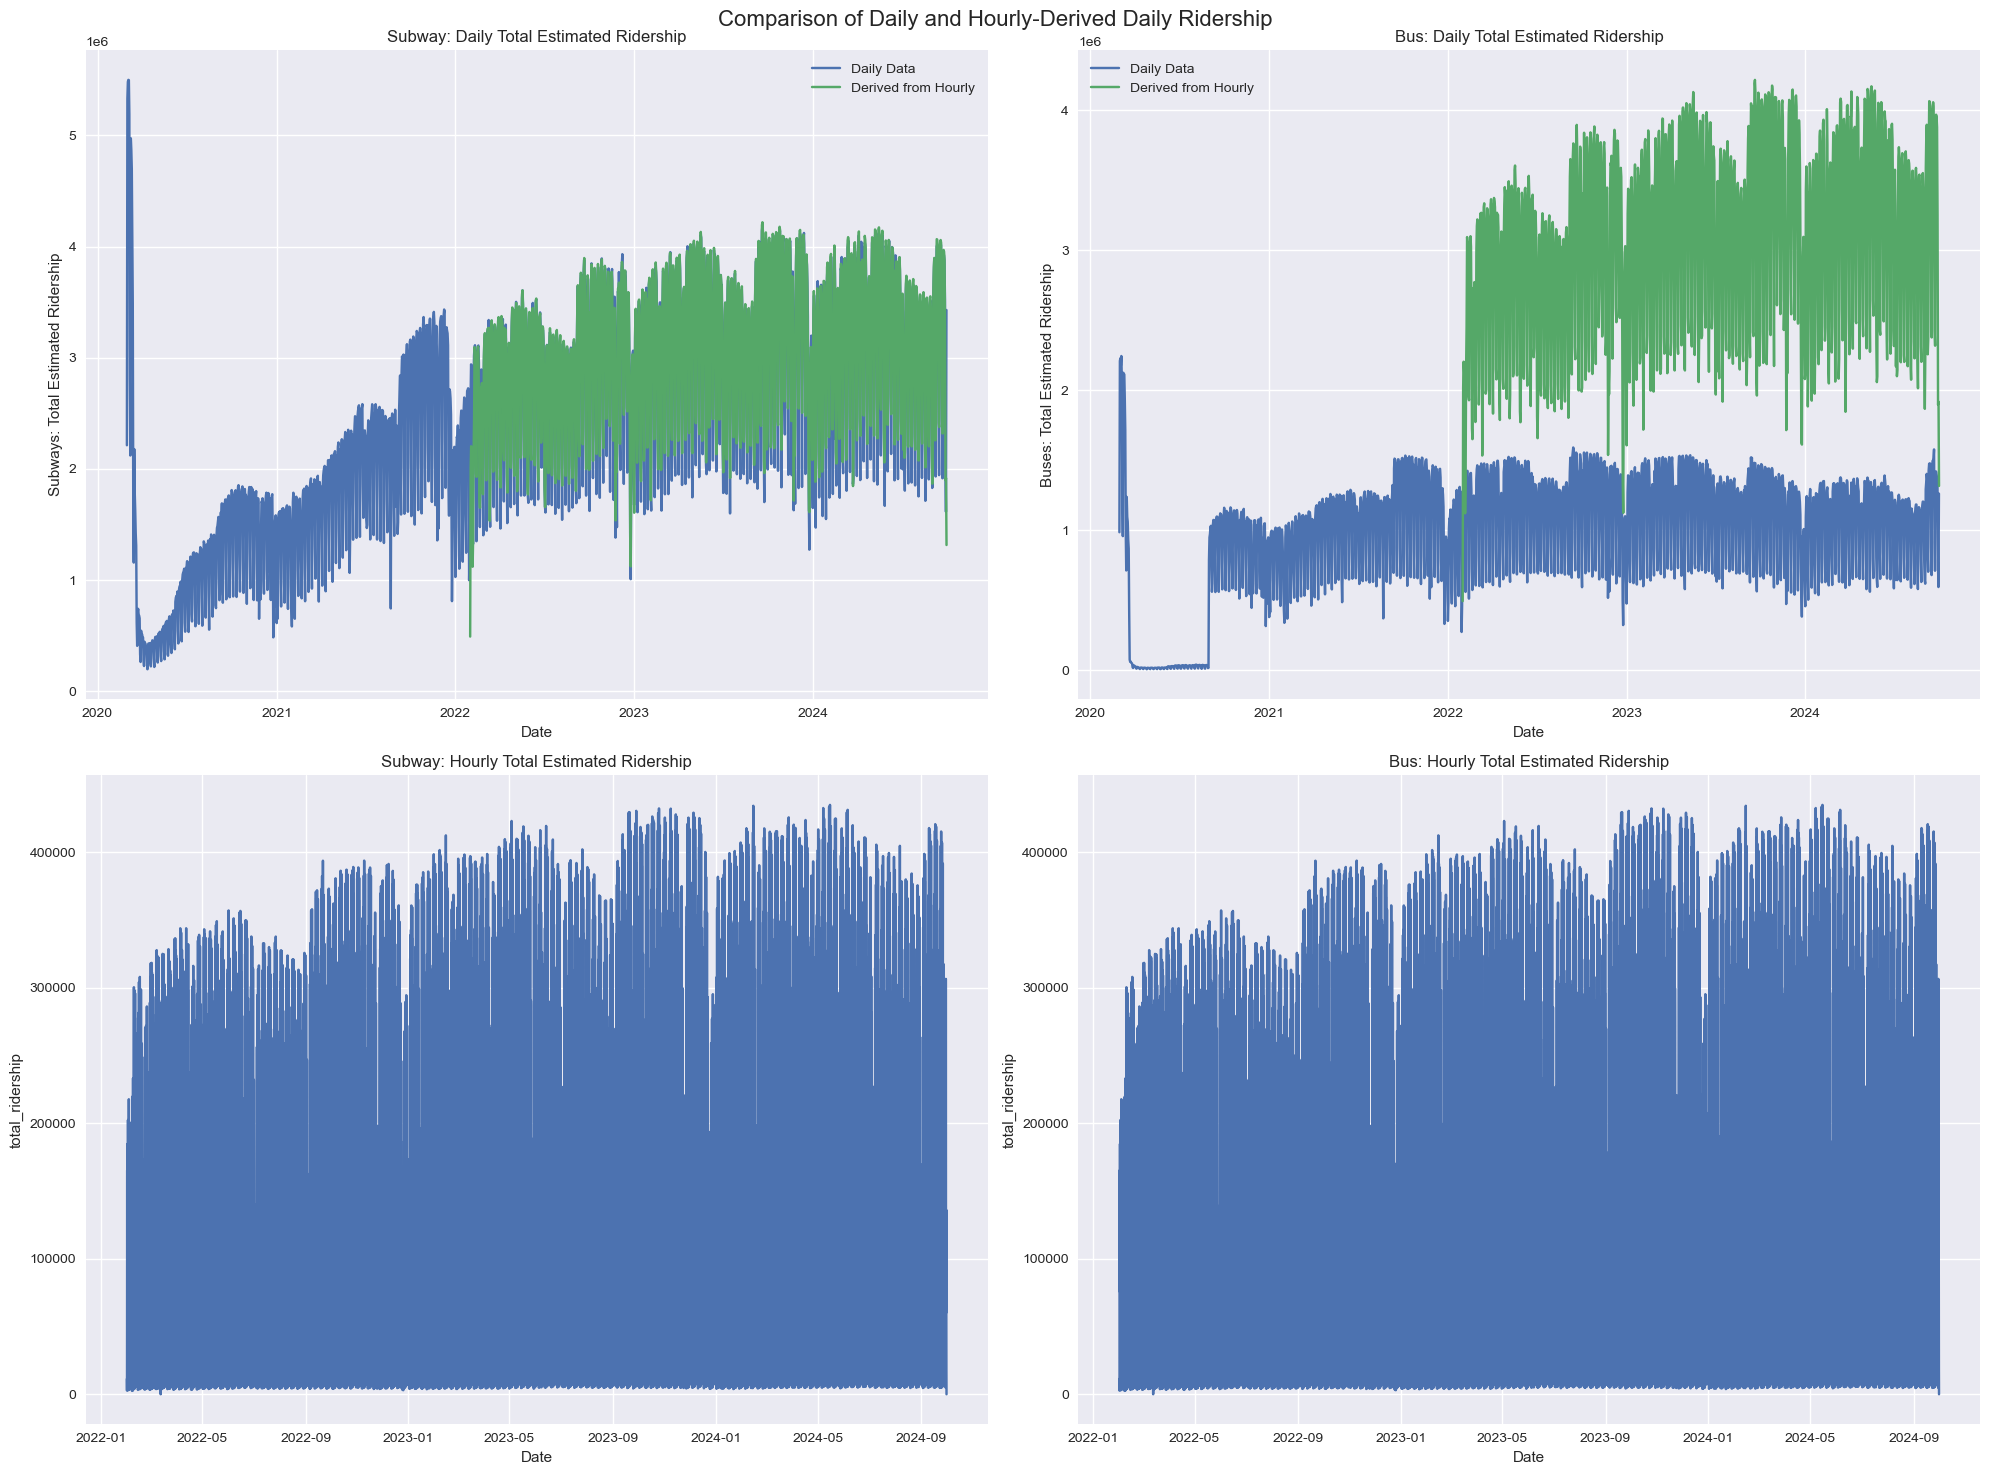

In [37]:
# Convert 'hour' column to datetime for hourly data and remove timezone info
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour']).dt.tz_localize(None)
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour']).dt.tz_localize(None)

# Ensure 'Date' column in daily_subway_df and daily_bus_df has no timezone info
daily_subway_df['Date'] = pd.to_datetime(daily_subway_df['Date']).dt.tz_localize(None)
daily_bus_df['Date'] = pd.to_datetime(daily_bus_df['Date']).dt.tz_localize(None)

# Convert 'Date' column in df to datetime without timezone
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Comparison of Daily and Hourly-Derived Daily Ridership', fontsize=16)

# Plot for Subway
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0, 0], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_subway_df, ax=axs[0, 0], label='Derived from Hourly')
axs[0, 0].set_title('Subway: Daily Total Estimated Ridership')
axs[0, 0].set_xlabel('Date')
axs[0, 0].legend()

# Plot for Bus
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[0, 1], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_bus_df, ax=axs[0, 1], label='Derived from Hourly')
axs[0, 1].set_title('Bus: Daily Total Estimated Ridership')
axs[0, 1].set_xlabel('Date')
axs[0, 1].legend()

# Plot hourly data for Subway
sns.lineplot(x='hour', y='total_ridership', data=hourly_subway_df, ax=axs[1, 0])
axs[1, 0].set_title('Subway: Hourly Total Estimated Ridership')
axs[1, 0].set_xlabel('Date')

# Plot hourly data for Bus
sns.lineplot(x='hour', y='total_ridership', data=hourly_bus_df, ax=axs[1, 1])
axs[1, 1].set_title('Bus: Hourly Total Estimated Ridership')
axs[1, 1].set_xlabel('Date')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


20 biggest outliers for Subway Ridership - MSTL Decomposition:
Time: 2023-07-04 04:00:00, Residual: 198526.4752098823
Time: 2024-05-27 04:00:00, Residual: 197077.55723661947
Time: 2024-07-04 04:00:00, Residual: 175592.62933266995
Time: 2024-09-02 04:00:00, Residual: 172169.96342559406
Time: 2023-05-29 04:00:00, Residual: 170629.08714916854
Time: 2023-07-04 13:00:00, Residual: 169608.13150491167
Time: 2023-11-23 12:00:00, Residual: 169552.08555278994
Time: 2024-05-27 13:00:00, Residual: 168687.36670445045
Time: 2024-05-27 03:00:00, Residual: 167643.0513783147
Time: 2023-09-04 04:00:00, Residual: 159174.30598993236
Time: 2022-11-24 12:00:00, Residual: 158050.4496321222
Time: 2023-05-29 03:00:00, Residual: 155777.0589051308
Time: 2024-06-19 04:00:00, Residual: 154375.32964098983
Time: 2024-02-13 03:00:00, Residual: 154064.42825049767
Time: 2023-11-23 03:00:00, Residual: 154012.42012736242
Time: 2024-07-04 13:00:00, Residual: 149679.5442850996
Time: 2024-09-02 03:00:00, Residual: 148906.5

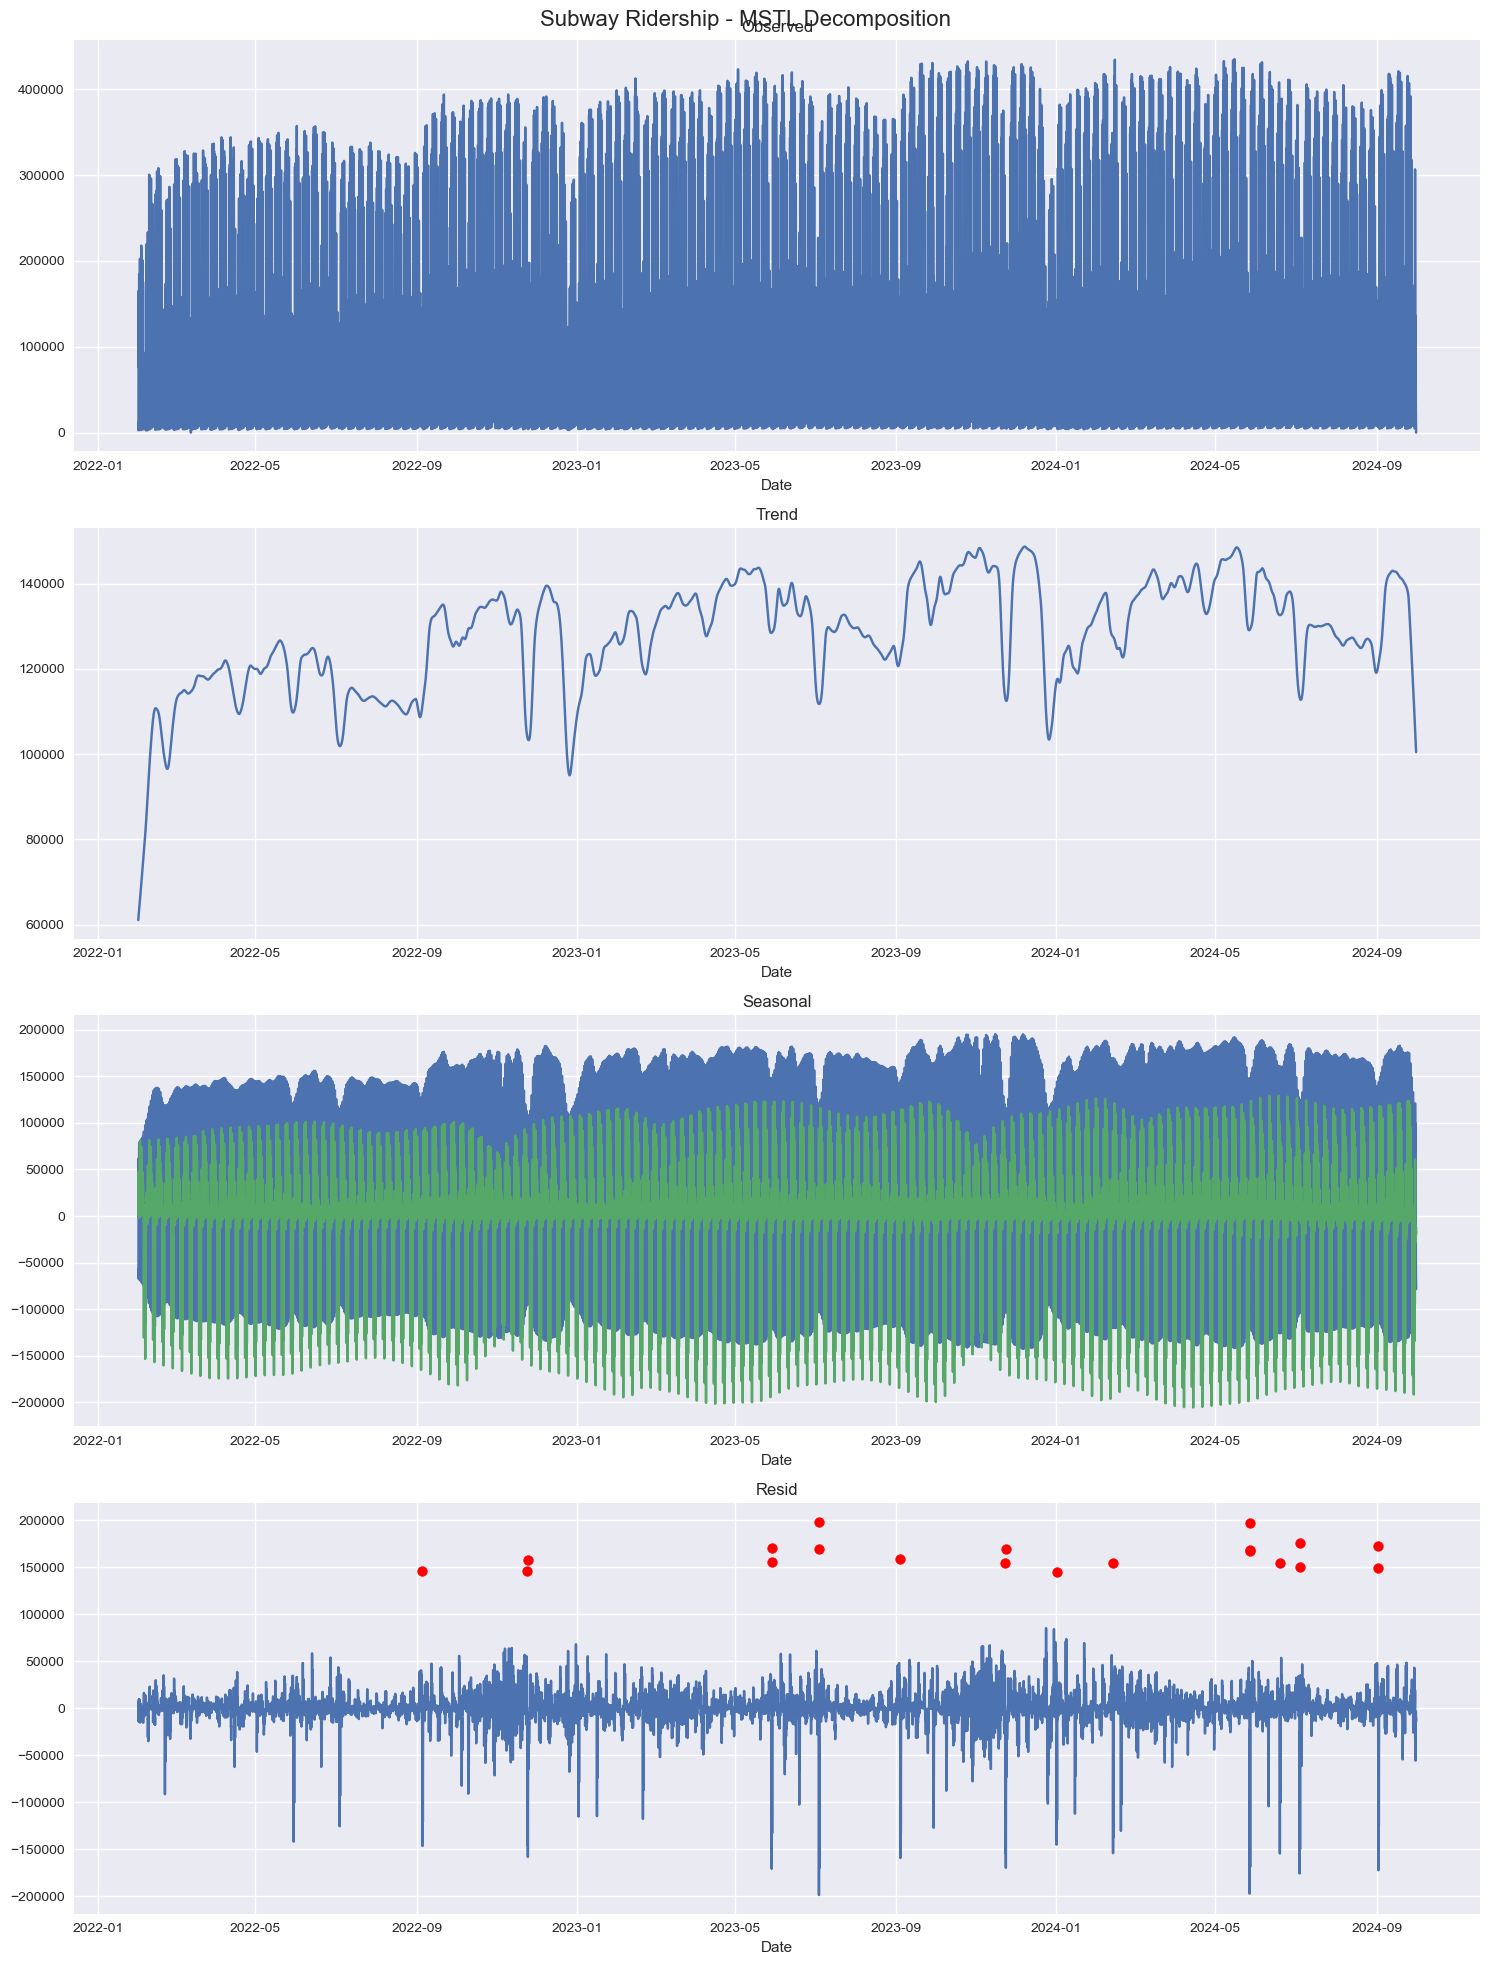


20 biggest outliers for Bus Ridership - MSTL Decomposition:
Time: 2023-07-04 04:00:00, Residual: 198526.4752098823
Time: 2024-05-27 04:00:00, Residual: 197077.55723661947
Time: 2024-07-04 04:00:00, Residual: 175592.62933266995
Time: 2024-09-02 04:00:00, Residual: 172169.96342559406
Time: 2023-05-29 04:00:00, Residual: 170629.08714916854
Time: 2023-07-04 13:00:00, Residual: 169608.13150491167
Time: 2023-11-23 12:00:00, Residual: 169552.08555278994
Time: 2024-05-27 13:00:00, Residual: 168687.36670445045
Time: 2024-05-27 03:00:00, Residual: 167643.0513783147
Time: 2023-09-04 04:00:00, Residual: 159174.30598993236
Time: 2022-11-24 12:00:00, Residual: 158050.4496321222
Time: 2023-05-29 03:00:00, Residual: 155777.0589051308
Time: 2024-06-19 04:00:00, Residual: 154375.32964098983
Time: 2024-02-13 03:00:00, Residual: 154064.42825049767
Time: 2023-11-23 03:00:00, Residual: 154012.42012736242
Time: 2024-07-04 13:00:00, Residual: 149679.5442850996
Time: 2024-09-02 03:00:00, Residual: 148906.5801

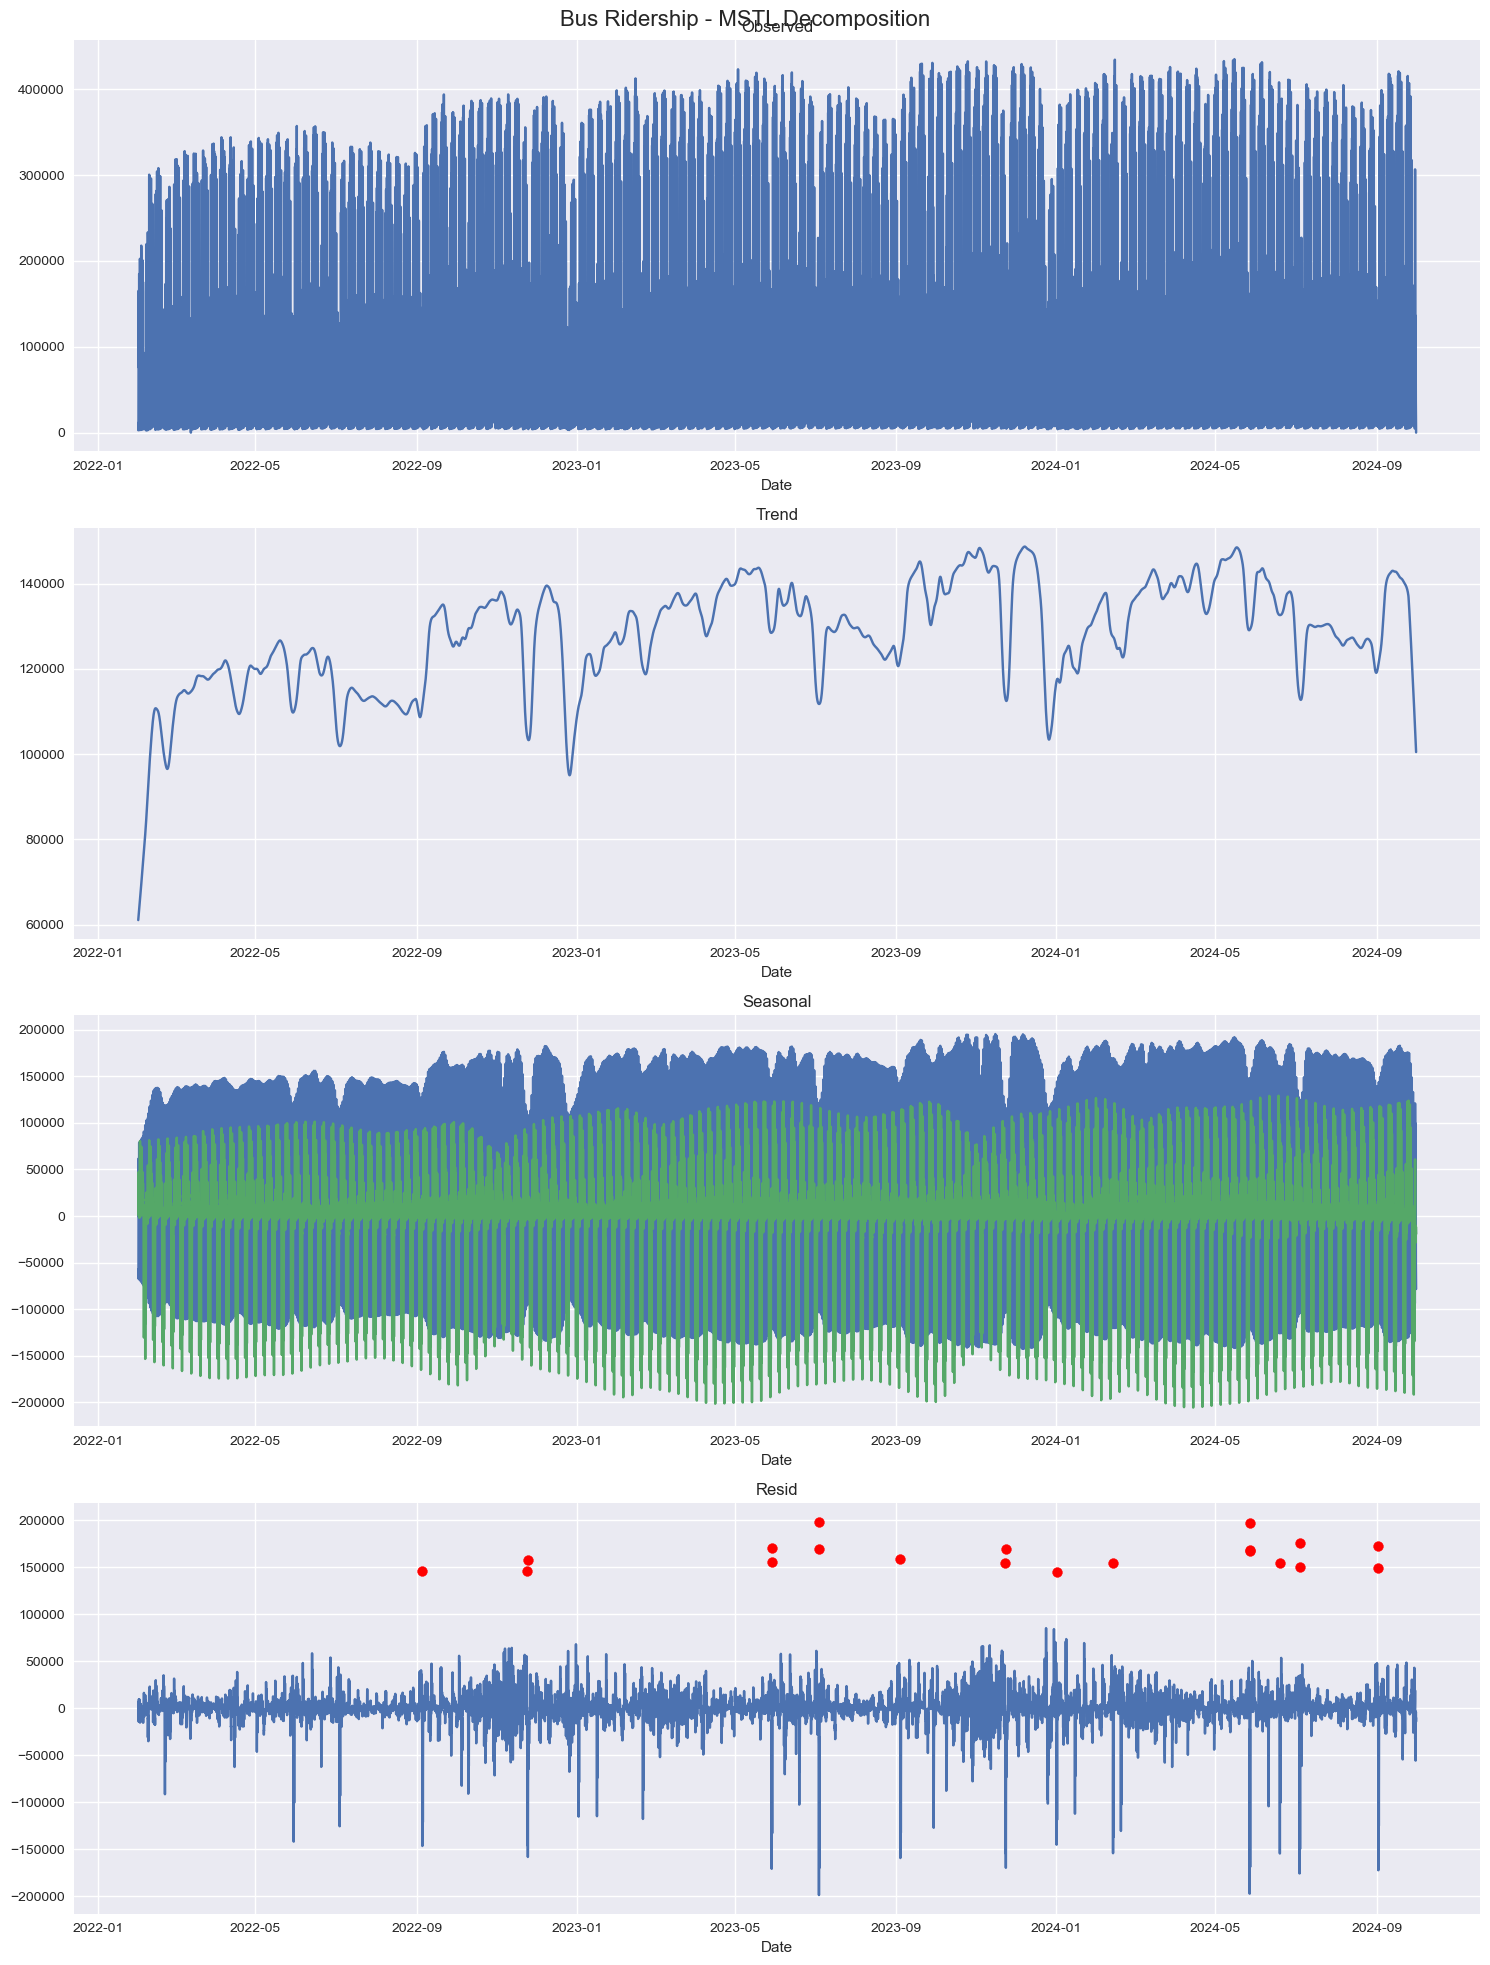

In [38]:
# Import required libraries
from statsmodels.tsa.seasonal import MSTL
import numpy as np

def perform_mstl(data, periods=[7, 365]):
    mstl = MSTL(data, periods=periods).fit()
    return mstl

# Perform MSTL decomposition for subway data
subway_decomposition = perform_mstl(hourly_subway_df['total_ridership'], periods=[24, 24*7])

# Perform MSTL decomposition for bus data
bus_decomposition = perform_mstl(hourly_bus_df['total_ridership'], periods=[24, 24*7])

# Plot the decomposition results
def plot_decomposition(decomposition, title, df):
    fig, axs = plt.subplots(4, 1, figsize=(15, 20))
    fig.suptitle(title, fontsize=16)
    
    components = ['observed', 'trend', 'seasonal', 'resid']
    
    for i, component in enumerate(components):
        axs[i].plot(df['hour'], getattr(decomposition, component))
        axs[i].set_title(component.capitalize())
        axs[i].set_xlabel('Date')
        
        if component == 'resid':
            # Find the 20 biggest outliers
            residuals = getattr(decomposition, component)
            outliers = np.abs(residuals).nlargest(20)
            
            # Plot the outliers as red dots
            axs[i].scatter(df['hour'].iloc[outliers.index], outliers, color='red', s=50)
            
            # Print the times of the outliers
            print(f"\n20 biggest outliers for {title}:")
            for time, value in zip(df['hour'].iloc[outliers.index], outliers):
                print(f"Time: {time}, Residual: {value}")
        
    plt.tight_layout()
    plt.show()

# Plot decomposition for subway data
plot_decomposition(subway_decomposition, 'Subway Ridership - MSTL Decomposition', hourly_subway_df)

# Plot decomposition for bus data
plot_decomposition(bus_decomposition, 'Bus Ridership - MSTL Decomposition', hourly_bus_df)


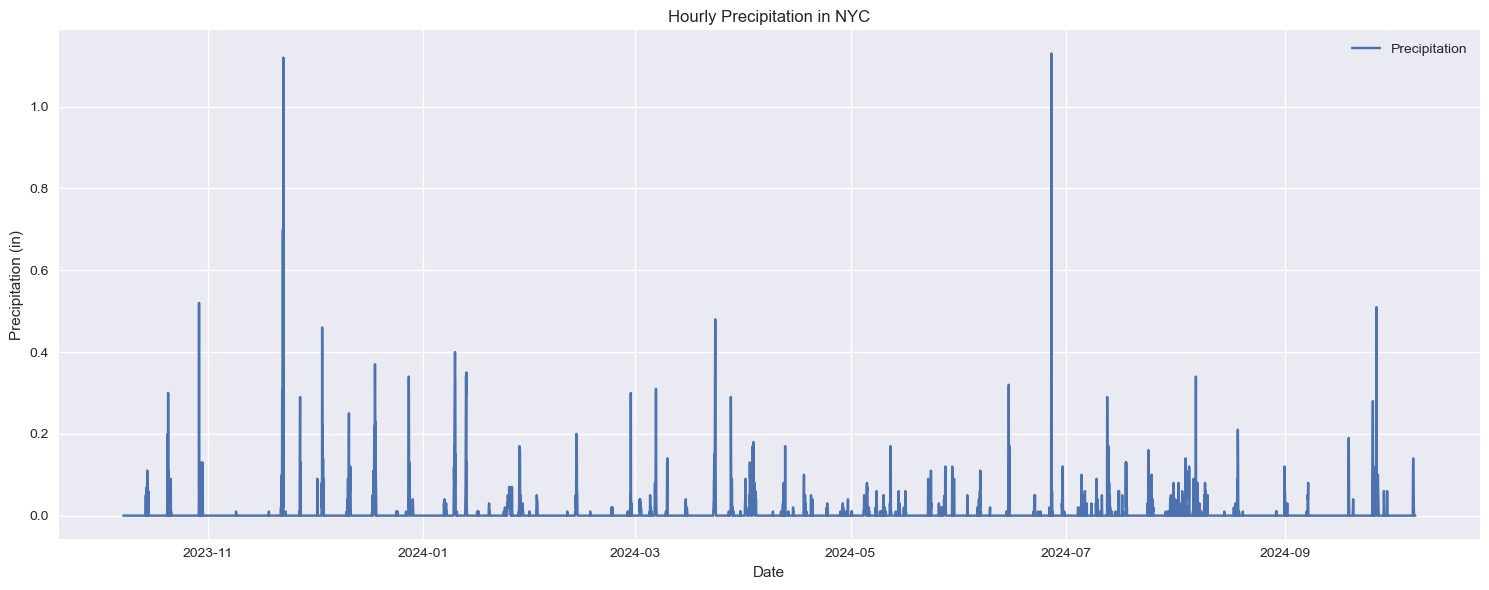

Weather data starts from: 2023-10-08 00:00:00
Number of hours in weather data: 8784
Number of hours in subway data after cutoff: 8612
Number of hours in bus data after cutoff: 8612

Updated Weather DataFrame:
                 time  temp_c  humidity  wind_kph  heat_index  wind_chill  \
0 2023-10-08 00:00:00    12.8        66      16.9       33.88   11.179562   
1 2023-10-08 01:00:00    12.4        67      16.6       33.81   10.710669   
2 2023-10-08 02:00:00     9.8        92      18.7       39.46    7.253050   
3 2023-10-08 03:00:00    11.4        65      19.4       32.15    9.196489   
4 2023-10-08 04:00:00    10.8        64      19.4       31.22    8.441256   

   discomfort_index  humidity_temperature_index  
0             6.882                       844.8  
1             6.489                       830.8  
2             4.804                       901.6  
3             5.295                       741.0  
4             4.588                       691.2  


In [41]:
# Read in hourly weather data
weather_df = pd.read_csv('../assets/nyc_hourly_weather_2023_10_08.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'])

# Calculate additional features
weather_df['heat_index'] = weather_df['temp_c'] + 0.33 * weather_df['humidity'] - 0.70
weather_df['wind_chill'] = 13.12 + 0.6215 * weather_df['temp_c'] - 11.37 * weather_df['wind_kph']**0.16 + 0.3965 * weather_df['temp_c'] * weather_df['wind_kph']**0.16
weather_df['discomfort_index'] = 0.5 * (weather_df['temp_c'] + 61.0 + ((weather_df['temp_c'] - 68.0) * 1.2) + (weather_df['humidity'] * 0.094))
weather_df['humidity_temperature_index'] = weather_df['humidity'] * weather_df['temp_c']

# Find the earliest datetime in the weather data
earliest_weather_datetime = weather_df['time'].min()

# Cutoff the hourly ridership data before the earliest hour in the weather data
hourly_subway_df = hourly_subway_df[hourly_subway_df['hour'] >= earliest_weather_datetime]
hourly_bus_df = hourly_bus_df[hourly_bus_df['hour'] >= earliest_weather_datetime]

# Plot the precipitation weather data over time
plt.figure(figsize=(15, 6))
plt.plot(weather_df['time'], weather_df['precip_in'], label='Precipitation')
plt.title('Hourly Precipitation in NYC')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some information about the data
print(f"Weather data starts from: {earliest_weather_datetime}")
print(f"Number of hours in weather data: {len(weather_df)}")
print(f"Number of hours in subway data after cutoff: {len(hourly_subway_df)}")
print(f"Number of hours in bus data after cutoff: {len(hourly_bus_df)}")

# Display the first few rows of the updated weather DataFrame
print("\nUpdated Weather DataFrame:")
print(weather_df[['time', 'temp_c', 'humidity', 'wind_kph', 'heat_index', 'wind_chill', 'discomfort_index', 'humidity_temperature_index']].head())

Correlations between weather variables and MSTL residuals (lag = 0 hour(s)):
Date range: 2024-07-01 to 2024-07-30
                            Subway Residual Correlation  \
cloud                                         -0.095070   
wind_chill                                     0.034702   
discomfort_index                               0.033812   
temp_c                                         0.033074   
temp_f                                         0.032950   
pressure_mb                                    0.032872   
feelslike_c                                    0.031732   
feelslike_f                                    0.031534   
precip_mm                                     -0.029336   
precip_in                                     -0.026008   
pressure_in                                    0.025786   
uv                                             0.023124   
wind_kph                                       0.016167   
wind_mph                                       0.015937   
h

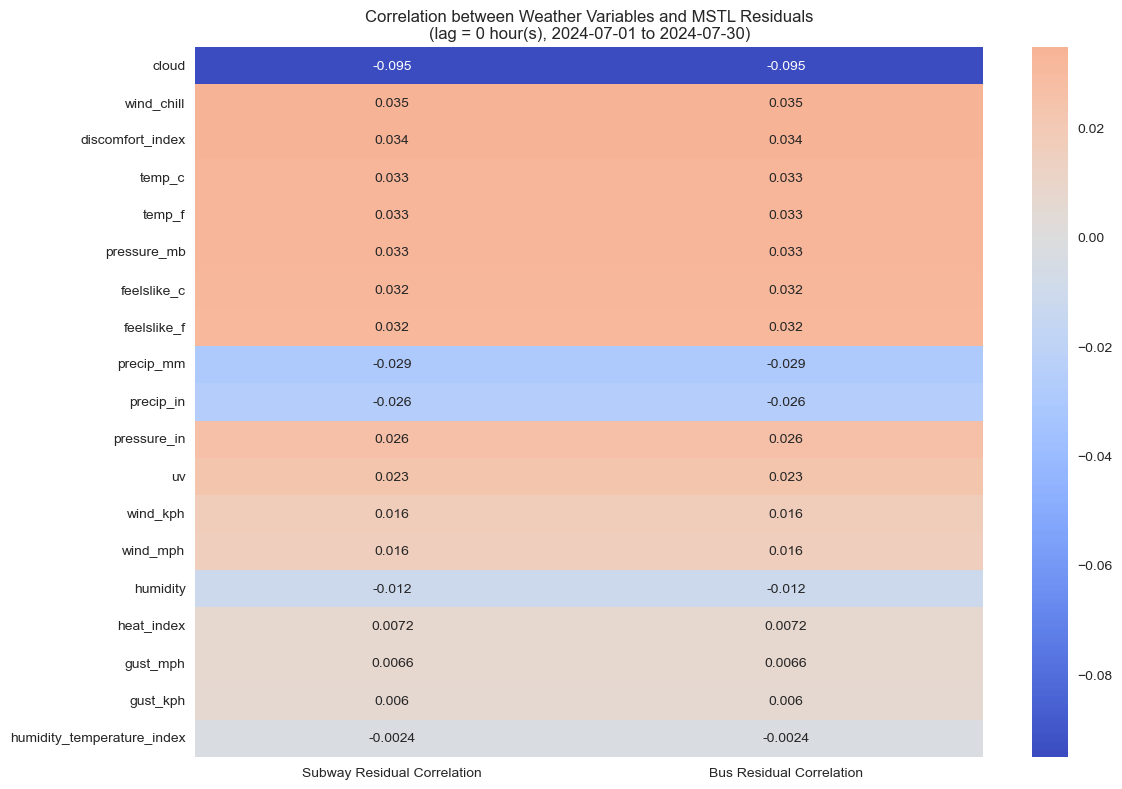

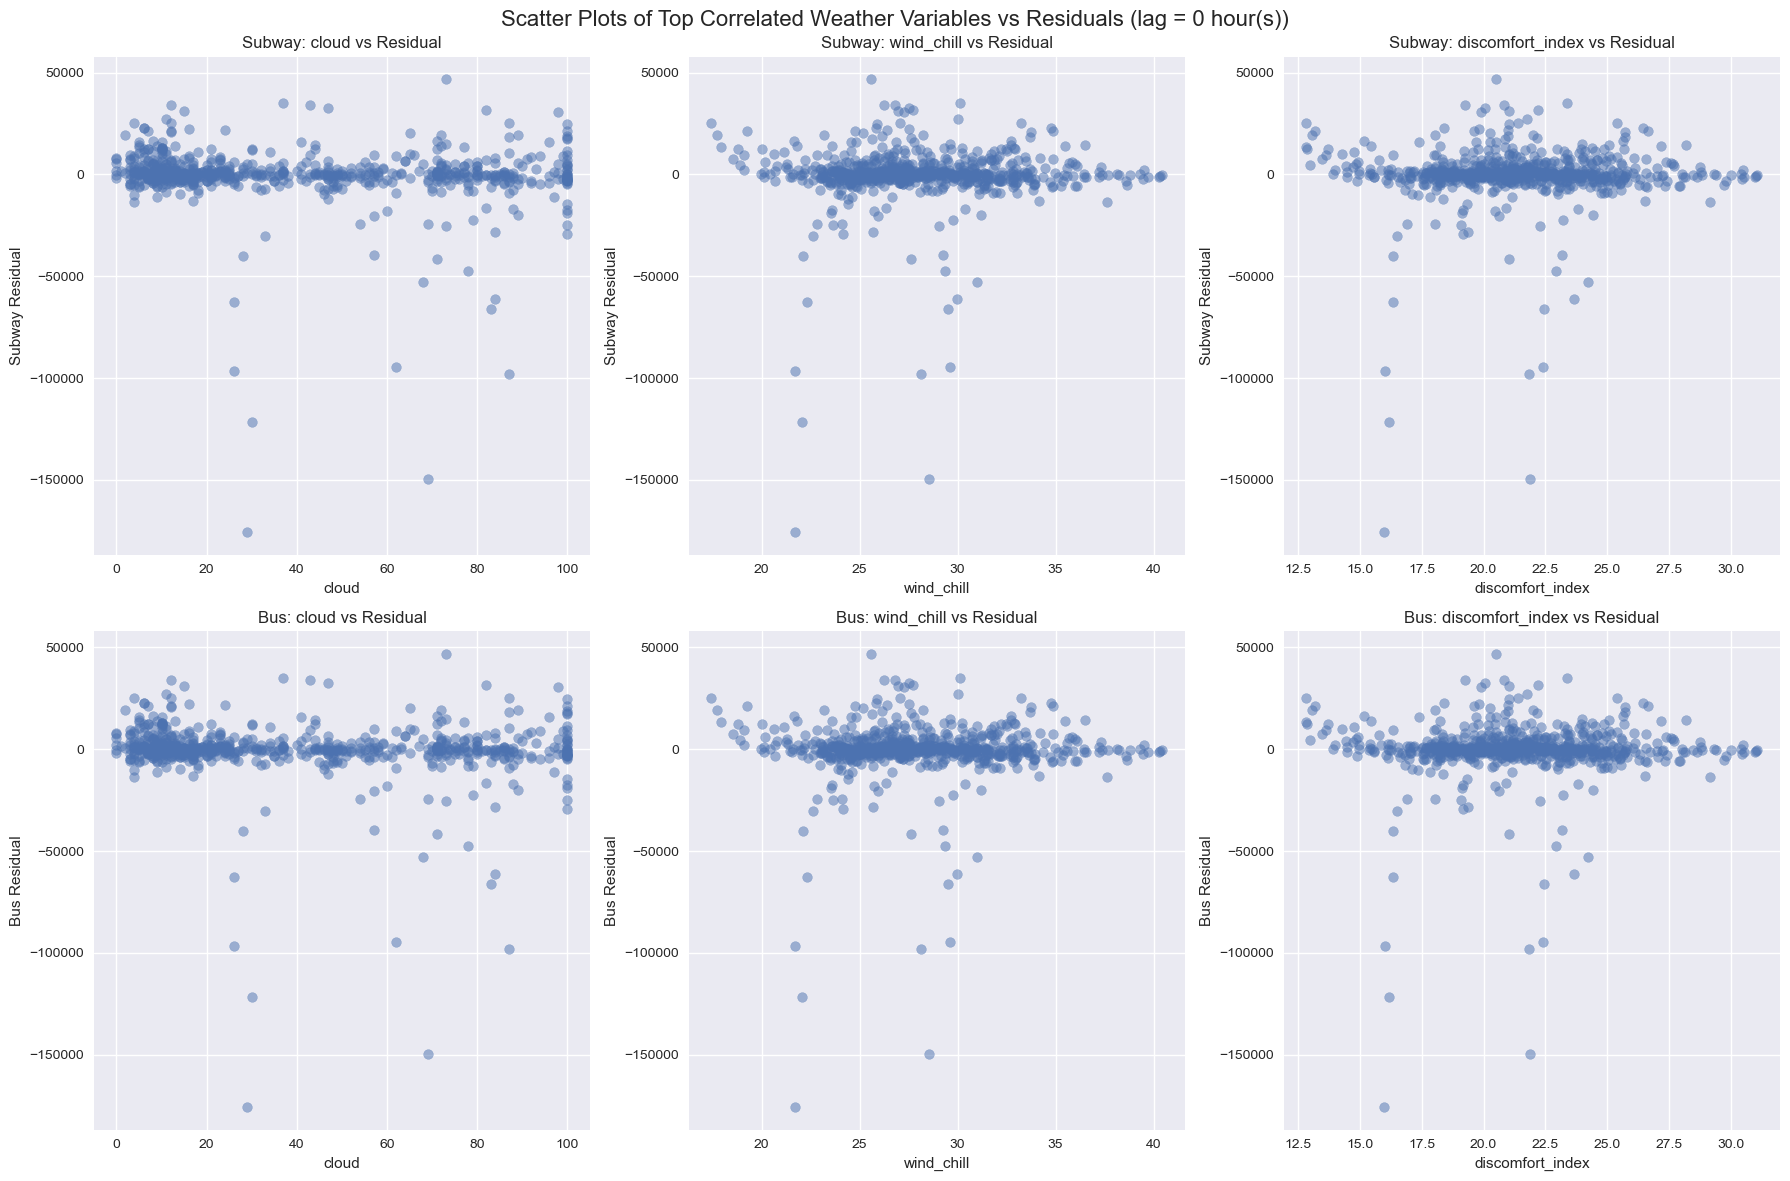

In [59]:
def analyze_weather_impact(hourly_subway_df, hourly_bus_df, weather_df, subway_decomposition, bus_decomposition, lag=0, start_date=None, end_date=None):
    # Shift weather data by the specified lag
    weather_df_lagged = weather_df.copy()
    weather_df_lagged['time'] = weather_df_lagged['time'] + pd.Timedelta(hours=lag)

    # Merge weather data with residuals from MSTL decomposition
    subway_weather_df = pd.merge(
        pd.DataFrame({'hour': hourly_subway_df['hour'], 'residual': subway_decomposition.resid}),
        weather_df_lagged,
        left_on='hour',
        right_on='time'
    )
    bus_weather_df = pd.merge(
        pd.DataFrame({'hour': hourly_bus_df['hour'], 'residual': bus_decomposition.resid}),
        weather_df_lagged,
        left_on='hour',
        right_on='time'
    )

    # Filter data for the specified date range
    if start_date and end_date:
        subway_weather_df = subway_weather_df[(subway_weather_df['hour'] >= start_date) & (subway_weather_df['hour'] <= end_date)]
        bus_weather_df = bus_weather_df[(bus_weather_df['hour'] >= start_date) & (bus_weather_df['hour'] <= end_date)]

    # Remove the first 'lag' number of rows and last 'lag' number of rows
    subway_weather_df = subway_weather_df.iloc[lag:-lag] if lag > 0 else subway_weather_df
    bus_weather_df = bus_weather_df.iloc[lag:-lag] if lag > 0 else bus_weather_df

    # List of weather variables to analyze
    weather_vars = ['temp_c', 'temp_f', 'precip_mm', 'precip_in', 'humidity', 'wind_kph', 'wind_mph',
                    'pressure_mb', 'pressure_in', 'cloud', 'feelslike_c', 'feelslike_f', 'uv',
                    'gust_kph', 'gust_mph', 'heat_index', 'wind_chill', 'discomfort_index', 'humidity_temperature_index']

    # Calculate correlations for subway residuals
    subway_correlations = subway_weather_df[weather_vars + ['residual']].corr()['residual'].drop('residual')

    # Calculate correlations for bus residuals
    bus_correlations = bus_weather_df[weather_vars + ['residual']].corr()['residual'].drop('residual')

    # Create a DataFrame to display correlations side by side
    correlation_df = pd.DataFrame({
        'Subway Residual Correlation': subway_correlations,
        'Bus Residual Correlation': bus_correlations
    })

    # Sort by absolute correlation values for subway
    correlation_df = correlation_df.reindex(correlation_df['Subway Residual Correlation'].abs().sort_values(ascending=False).index)

    # Display the correlations
    print(f"Correlations between weather variables and MSTL residuals (lag = {lag} hour(s)):")
    if start_date and end_date:
        print(f"Date range: {start_date} to {end_date}")
    print(correlation_df)

    # Visualize the correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation between Weather Variables and MSTL Residuals (lag = {lag} hour(s))')
    if start_date and end_date:
        plt.title(f'Correlation between Weather Variables and MSTL Residuals\n(lag = {lag} hour(s), {start_date} to {end_date})')
    plt.tight_layout()
    plt.show()

        # Create scatter plots for top 3 correlated variables
    top_vars = correlation_df['Subway Residual Correlation'].abs().nlargest(3).index

    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Scatter Plots of Top Correlated Weather Variables vs Residuals (lag = {lag} hour(s))', fontsize=16)

    for i, var in enumerate(top_vars):
        # Subway scatter plot
        axs[0, i].scatter(subway_weather_df[var], subway_weather_df['residual'], alpha=0.5)
        axs[0, i].set_xlabel(var)
        axs[0, i].set_ylabel('Subway Residual')
        axs[0, i].set_title(f'Subway: {var} vs Residual')

        # Bus scatter plot
        axs[1, i].scatter(bus_weather_df[var], bus_weather_df['residual'], alpha=0.5)
        axs[1, i].set_xlabel(var)
        axs[1, i].set_ylabel('Bus Residual')
        axs[1, i].set_title(f'Bus: {var} vs Residual')

    plt.tight_layout()
    plt.show()


# Example usage for February 2024:
start_date = '2024-07-01'
end_date = '2024-07-30'

analyze_weather_impact(hourly_subway_df, hourly_bus_df, weather_df, subway_decomposition, bus_decomposition, lag=0, start_date=start_date, end_date=end_date)